# Assignment 5 – Machine Learning in  R

**Author**: Ilmini De Silva   
**Date**: 07/23/3025  
**Environment**: See `environment.yml`  
**Description**:  
This notebook explores basic machine learning using [caret,tidyverse,gglpot2) including data preparation, model training, and evaluation.

**load the library**

In [83]:
library(caret)
library(lattice)



**loading the dataset**

In [84]:

filename <- "iris.csv"
dataset <- read.csv(filename, header=FALSE)
dataset <- dataset[-1, ]
colnames(dataset) <- c("Sepal.Length","Sepal.Width","Petal.Length","Petal.Width","Species")

*Measurement variables are treated as numerical vectors*

In [85]:
dataset$Sepal.Length <- as.numeric(dataset$Sepal.Length)
dataset$Sepal.Width  <- as.numeric(dataset$Sepal.Width)
dataset$Petal.Length <- as.numeric(dataset$Petal.Length)
dataset$Petal.Width  <- as.numeric(dataset$Petal.Width)
dataset$Species      <- as.factor(dataset$Species)



**Creating a validatiion dataset**

In [86]:

# create a list of 80% of the rows in the original dataset we can use for training
validation_index <- createDataPartition(dataset$Species, p=0.80, list=FALSE)
# select 20% of the data for validation
validation <- dataset[-validation_index,]
# use the remaining 80% of data to training and testing the models
dataset <- dataset[validation_index,]

**dimesions of the dataset**

In [87]:
dim(dataset)

[1] 120   5

**types of attributes**

In [88]:
sapply(dataset, class)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
   "numeric"    "numeric"    "numeric"    "numeric"     "factor"

**first five rows of the data**

In [89]:
head(dataset, 5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2,5.1,3.5,1.4,0.2,setosa
3,4.9,3.0,1.4,0.2,setosa
4,4.7,3.2,1.3,0.2,setosa
6,5.0,3.6,1.4,0.2,setosa
7,5.4,3.9,1.7,0.4,setosa


**list the levels for the class**

In [90]:
levels(dataset$Species)

[1] "setosa"     "versicolor" "virginica"

**class distribution summary**

In [91]:
percentage <- prop.table(table(dataset$Species)) * 100
cbind(freq=table(dataset$Species), percentage=percentage)


,freq,percentage
setosa,40,33.33333
versicolor,40,33.33333
virginica,40,33.33333


### Statistical summary
mean, the min and max values 
25th, 50th,75th percentile

In [92]:
summary(dataset)

  Sepal.Length    Sepal.Width     Petal.Length   Petal.Width          Species  
 Min.   :4.300   Min.   :2.000   Min.   :1.10   Min.   :0.100   setosa    :40  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.60   1st Qu.:0.300   versicolor:40  
 Median :5.800   Median :3.000   Median :4.25   Median :1.300   virginica :40  
 Mean   :5.821   Mean   :3.048   Mean   :3.74   Mean   :1.199                  
 3rd Qu.:6.325   3rd Qu.:3.300   3rd Qu.:5.10   3rd Qu.:1.800                  
 Max.   :7.900   Max.   :4.200   Max.   :6.90   Max.   :2.500                  

 **Univariate Plots**
 -plots of each individual variable.

In [93]:
x <- dataset[,1:4]
y <- dataset[,5]

**box and whisker plots of each**

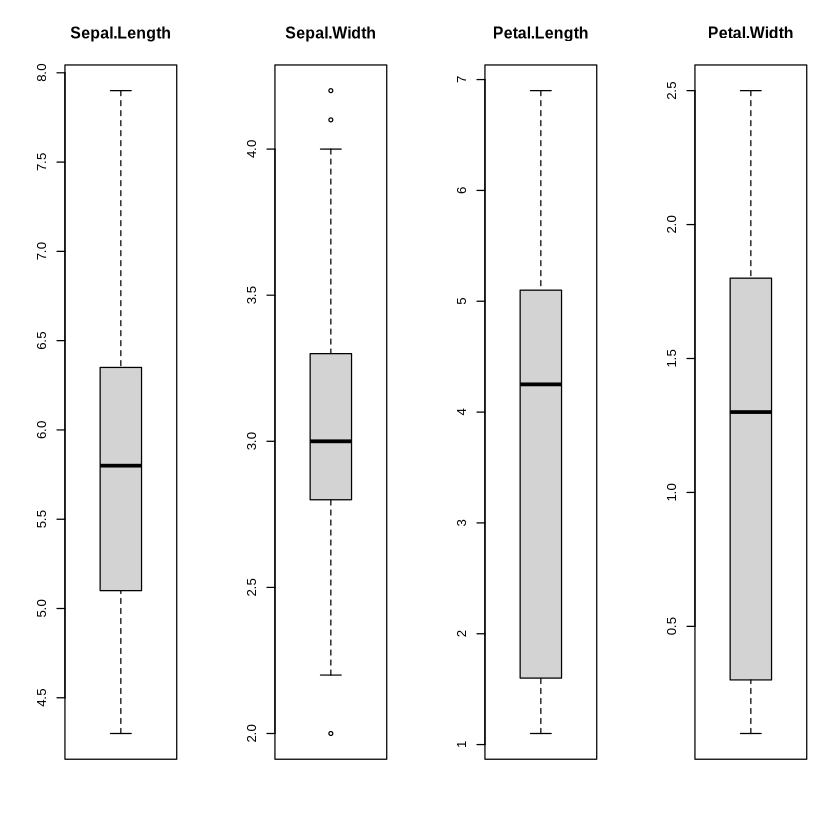

In [94]:
par(mfrow=c(1,4))
  for(i in 1:4) {
  boxplot(x[,i], main=names(iris)[i])
}

**bar plots** of species class variable 

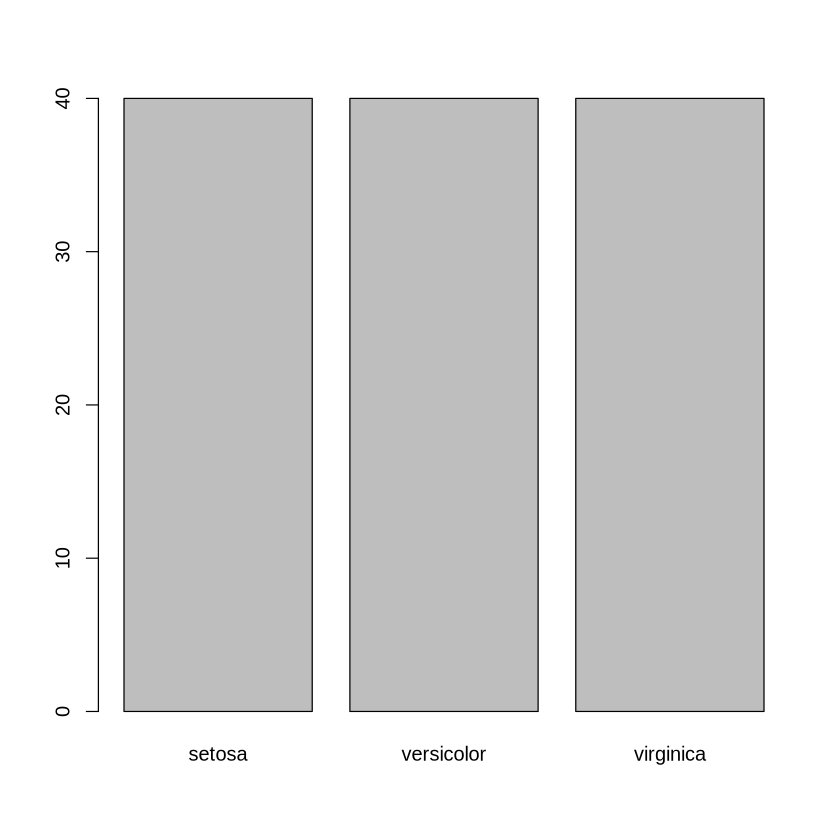

In [95]:
plot(y)

 ### Multivariate Plots
scatterplots of all pairs of attributes and color the points by class. 

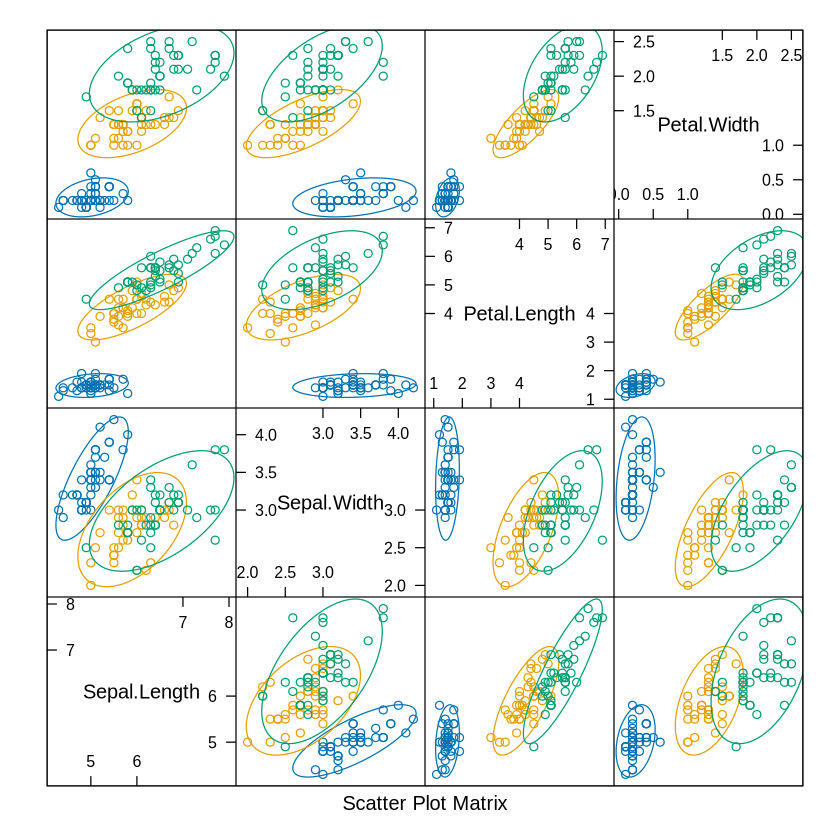

In [96]:
library(ellipse)
featurePlot(x=x, y=y, plot="ellipse")


**Box and whisker plot for each attributes**


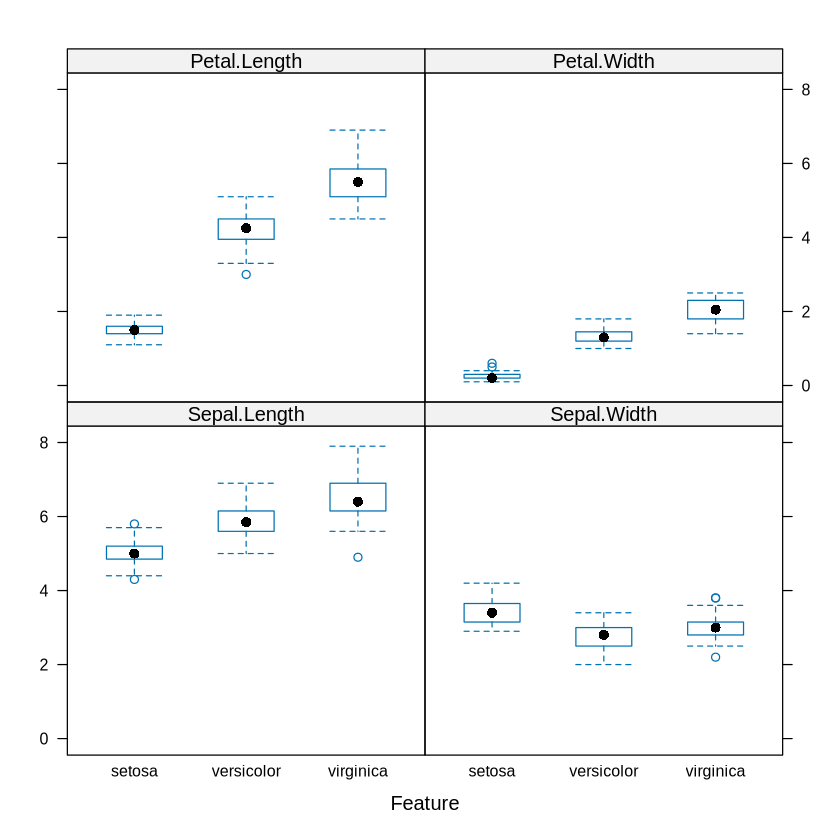

In [97]:
featurePlot(x=x, y=y, plot="box")

**density plots for each attribute by class value**

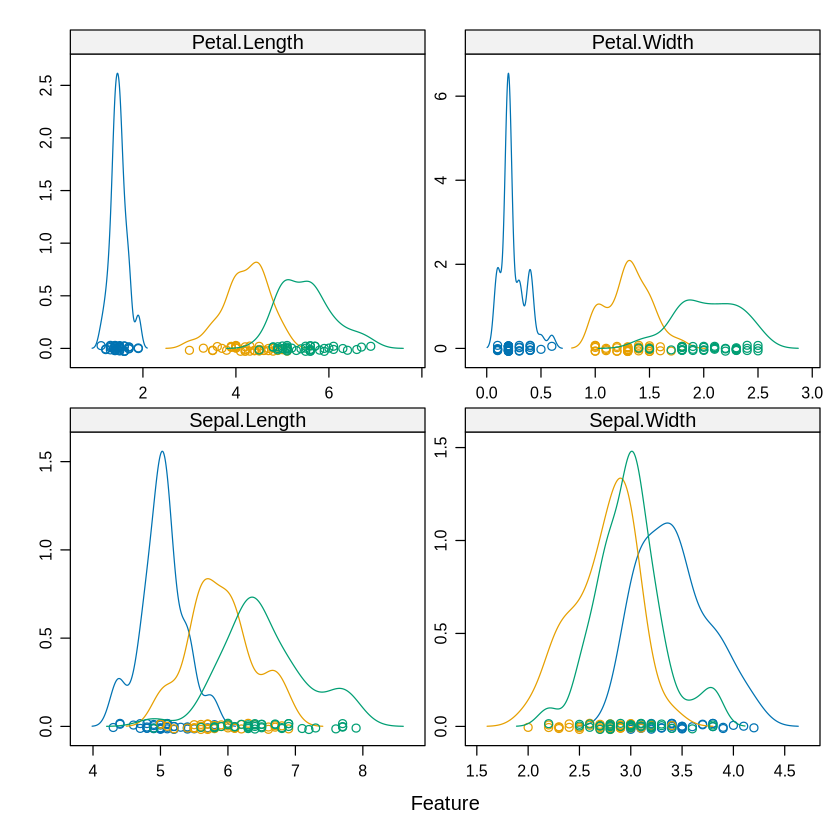

In [98]:
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)

Runnning algorithms using **10-fold cross validation**

In [99]:
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

### Evaluating 5 different algorithms
- Linear Discriminant Analysis (LDA)
- Classification and Regression Trees (CART).
- k-Nearest Neighbors (kNN).
- Support Vector Machines (SVM) with a linear kernel.
- Random Forest (RF

In [102]:
set.seed(7)
fit.lda <- train(Species~., data=dataset, method="lda", metric=metric, trControl=control)

set.seed(7)
fit.cart <- train(Species~., data=dataset, method="rpart", metric=metric, trControl=control)

set.seed(7)
fit.knn <- train(Species~., data=dataset, method="knn", metric=metric, trControl=control)

set.seed(7)
fit.svm <- train(Species~., data=dataset, method="svmRadial", metric=metric, trControl=control)

set.seed(7)
fit.rf <- train(Species~., data=dataset, method="rf", metric=metric, trControl=control)

In [103]:



results <- resamples(list(lda=fit.lda, cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results)


Call:
summary.resamples(object = results)

Models: lda, cart, knn, svm, rf 
Number of resamples: 10 

Accuracy 
          Min.   1st Qu.    Median      Mean   3rd Qu. Max. NA's
lda  0.8333333 0.9375000 1.0000000 0.9666667 1.0000000    1    0
cart 0.8333333 0.8541667 0.9166667 0.9166667 0.9791667    1    0
knn  0.8333333 0.9166667 0.9583333 0.9500000 1.0000000    1    0
svm  0.8333333 0.9166667 1.0000000 0.9500000 1.0000000    1    0
rf   0.8333333 0.9166667 1.0000000 0.9500000 1.0000000    1    0

Kappa 
     Min. 1st Qu. Median  Mean 3rd Qu. Max. NA's
lda  0.75 0.90625 1.0000 0.950 1.00000    1    0
cart 0.75 0.78125 0.8750 0.875 0.96875    1    0
knn  0.75 0.87500 0.9375 0.925 1.00000    1    0
svm  0.75 0.87500 1.0000 0.925 1.00000    1    0
rf   0.75 0.87500 1.0000 0.925 1.00000    1    0


**compare accuracy of the models with dot plots**

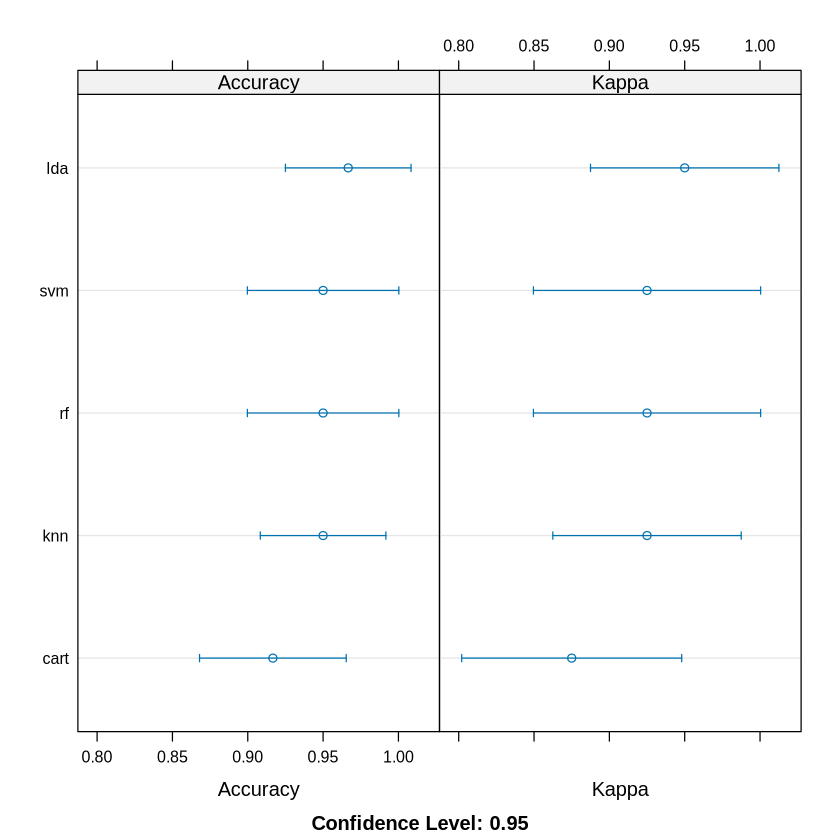

In [104]:
dotplot(results)

**summarizing the best results for the LDA model**

In [105]:
print(fit.lda)

Linear Discriminant Analysis 

120 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 108, 108, 108, 108, 108, ... 
Resampling results:

  Accuracy   Kappa
  0.9666667  0.95 



**Accuracy of the LDA**


In [106]:
predictions <- predict(fit.lda, validation)
confusionMatrix(predictions, validation$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         10          0         0
  versicolor      0         10         0
  virginica       0          0        10

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.8843, 1)
    No Information Rate : 0.3333     
    P-Value [Acc > NIR] : 4.857e-15  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           1.0000
Specificity                 1.0000            1.0000           1.0000
Pos Pred Value              1.0000            1.0000           1.0000
Neg Pred Value              1.0000            1.0000           1.0000
Prevalence                  0.3333            